In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#### 1. Read the data from the provided link

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Kushal997-das/THE-SPARKS-FOUNDATION/master/Prediction%20using%20Supervised%20ML/student_scores%20-%20student_scores.csv')

#### 2. Understand the data by reading first 5 and last 5 records from the dataset


In [ ]:
# First 5 records
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# Last 5 records
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


#### 3. Check the shape of data

In [ ]:
df.shape

(25, 2)

#### 4. Check if there is any null values

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### 5. Group the data using score and hours, then Using bar chart ,plot score vs hours. The next phase is to enter distribution scores and plot them according to the requirement, here we are going to enter the title, x_label, and y_label, and show it according to the desired result.

Axes(0.125,0.125;0.775x0.755)


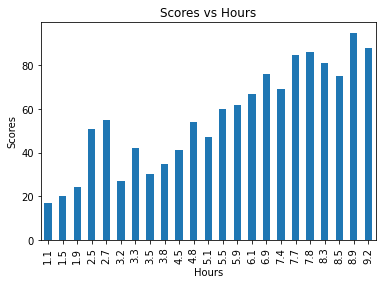

In [ ]:
grouped_data = df.groupby(["Hours"])["Scores"].sum()
print(grouped_data.plot(kind="bar", xlabel="Hours", ylabel="Scores", title="Scores vs Hours"))

#### 6. Visualize distribution of data using scatter plot

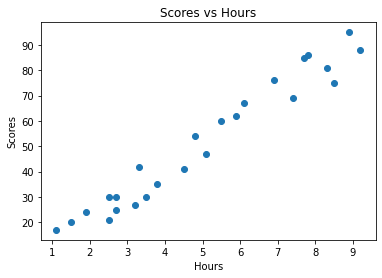

In [ ]:
plt.scatter(x=df['Hours'], y=df['Scores'])
plt.title("Scores vs Hours")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

#### 7. Prepare the data by splitting it into Training and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Hours'].values.reshape(-1, 1), df['Scores'], test_size=0.3, random_state=42)

#### 8. Plot the regression line

In [ ]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

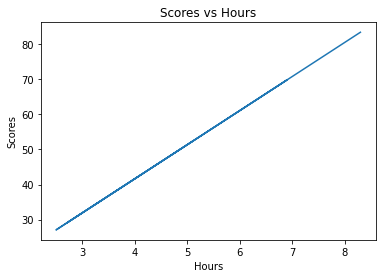

In [ ]:
y_pred = lm.predict(X_test)
plt.plot(X_test,y_pred)
plt.title("Scores vs Hours")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

#### 9. Plot the training and test data . Predict the score and compare predicted and actual score

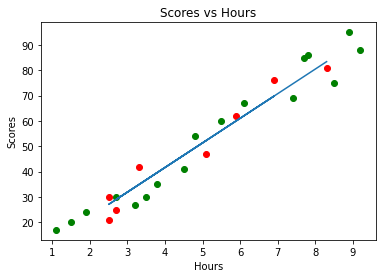

In [ ]:
plt.plot(X_test,y_pred)
plt.scatter(X_test, y_test, color='red')
plt.scatter(X_train, y_train, color='green')
plt.title("Scores vs Hours")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

#### 10. Predict accuracy using r2square

In [ ]:
r2_score(y_test, y_pred)

0.9487647340257012

#### 11. Predict the percentage grade of a student if study hours are 9.25

In [ ]:
print(lm.predict([[9.25]]))

[92.61670034]


#### 12. Evaluate the model: Calculate Mean absolute error, mean squared error, root mean squared error

In [ ]:
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Root mean squared error: ", np.sqrt(mean_absolute_error(y_test,y_pred)))

Mean absolute error:  4.499999999999998
Mean squared error:  23.61945761415174
Root mean squared error:  2.121320343559642


#### 13. Import seaborn and plot the distribution as well

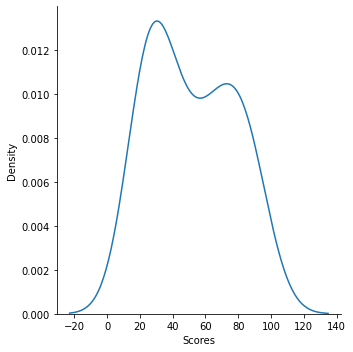

In [ ]:
sns.displot(df, x='Scores', kind="kde")

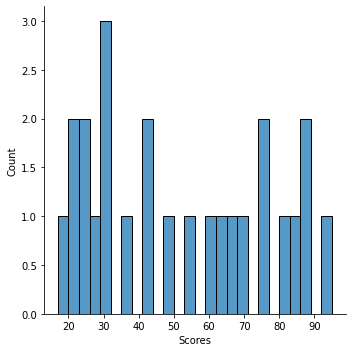

In [ ]:
sns.displot(df, x='Scores', binwidth=3)

#### 14. Print actual vs predicted percentage score

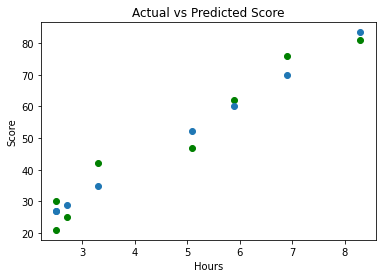

In [ ]:
plt.scatter(X_test,y_test, color='green')
plt.scatter(X_test,y_pred,)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Actual vs Predicted Score')
plt.show()

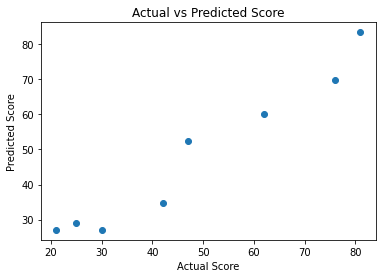

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Score')
plt.show()

#### 15. Apply ridge and grid search to improvise your model

In [ ]:
parameters1 = [{"alpha":[0.001,0.1,1,10]}]

RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv = 5, error_score='raise')
Grid1.fit(X_train, y_train)
print('Best Parameter:', Grid1.best_params_)
print('Best Score:', Grid1.best_score_)

Best Parameter: {'alpha': 0.001}
Best Score: 0.7242437831869969
